## 导入相关模块

In [2]:
from detect import *
import matplotlib.pyplot as plt
tf.enable_eager_execution()

## 创建模型并自动进行变量的初始化

In [3]:
P = PNet()
R = RNet()
O = ONet()

Instructions for updating:
Colocations handled automatically by placer.
PNet variables initialize completed
RNet variables initialize completed
ONet variables initialize completed


## 恢复已训练好的模型

In [4]:
P.restore()
R.restore()
O.restore()

## 创建检测器并导入模型

In [5]:
detector = Detect(P,R,O)

## 选择图片并运行检测器

In [68]:
image = cv2.imread(r'images/origin/risa_01.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
loc = detector.detect_face(image,minsize=30)

In [69]:
loc

array([[152,  49, 345, 243]])

## 编写可视化函数

In [54]:
def plt_bboxes(img, bboxes, figsize=(10, 10), linewidth=1.5):
    """Visualize bounding boxes.
    """
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
    height = img.shape[0]
    width = img.shape[1]
    for i in range(bboxes.shape[0]):
        x1 = bboxes[i, 0]
        y1 = bboxes[i, 1]
        x2 = bboxes[i, 2]
        y2 = bboxes[i, 3]
        rect = plt.Rectangle(
            (x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red')
        plt.gca().add_patch(rect)
    plt.show()

## 可视化检测结果

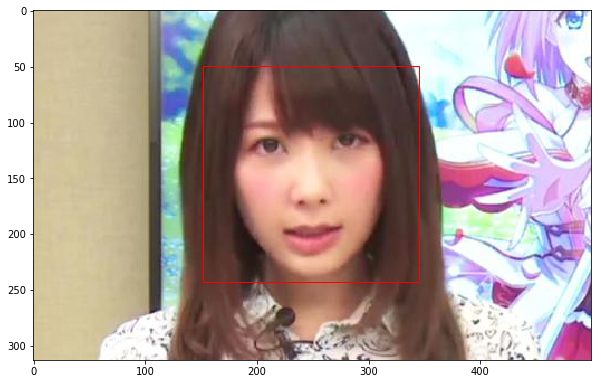

In [70]:
plt_bboxes(image,loc)